In [1]:
import pygad
import numpy
import cobra
from cobra import Model, Reaction, Metabolite

In [2]:
c

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [3]:
yali.compartments

{'ce': 'cell envelope',
 'e': 'extracellular',
 'm': 'mitochondrion',
 'c': 'cytoplasm',
 'p': 'peroxisome',
 'er': 'endoplasmic reticulum',
 'n': 'nucleus',
 'g': 'Golgi',
 'lp': 'lipid particle',
 'v': 'vacuole',
 'erm': 'endoplasmic reticulum membrane',
 'vm': 'vacuolar membrane',
 'mm': 'mitochondrial membrane',
 'gm': 'Golgi membrane'}

In [4]:
yali.objective='xBIOMASS'#'y001882' #yali.reactions.xBIOMASS

In [5]:
solution = yali.optimize()

In [6]:
solution.fluxes

xAMINOACID      0.105692
xBIOMASS        0.105692
xLIPID          0.000106
xMAINTENANCE    0.000000
xPOOL_AC_EM     0.011949
                  ...   
y300092         0.000000
y300093         0.000000
y300094         0.000000
y300095         0.000000
y300096         0.000000
Name: fluxes, Length: 1938, dtype: float64

In [7]:
# Define the bounds for the biomass reaction
bounds = [{"lower_bound": 0, "upper_bound": 1000}]

In [8]:
matrix1 = numpy.random.random((3, 3))
matrix1

array([[0.04166583, 0.55771755, 0.10204922],
       [0.17136754, 0.78143353, 0.1131846 ],
       [0.52680445, 0.10435698, 0.01060669]])

In [9]:
function_inputs = matrix1.round(decimals=0)
function_inputs

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [10]:
desired_output = 100

In [11]:
numpy.sum(function_inputs)

3.0

In [51]:
#def fitness_func(ga_instance, solution, solution_idx):
#    output = numpy.sum(solution*function_inputs)
#    fitness = 1.0 / numpy.abs(output - desired_output)
#    return fitness

# Define the objective function
def objective_function(ga_instance, solution, solution_idx):
    solution = yali.optimize()
    yali.reactions.get_by_id("xBIOMASS").upper_bound = 1000
    yali.reactions.get_by_id("xBIOMASS").lower_bound = 0
    print(solution)
    fitness = solution.objective_value
    return fitness

In [52]:
num_generations = 100
num_parents_mating = 4
mutation_rate = 0.1

fitness_function = objective_function #implementar mutacion mortal

sol_per_pop = 8
num_genes = 3

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 50 #porcentaje de genes de 2 a 1 en 50%

In [53]:
def on_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

In [54]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

In [55]:
ga_instance.run()

<Solution 0.106 at 0x7fcf955244d0>
<Solution 0.106 at 0x7fcf95520f90>
<Solution 0.106 at 0x7fcf95520910>
<Solution 0.106 at 0x7fcf95520fd0>
<Solution 0.106 at 0x7fcf95777350>
<Solution 0.106 at 0x7fcf95520fd0>
<Solution 0.106 at 0x7fcf9551ac50>
<Solution 0.106 at 0x7fcf95520fd0>
<Solution 0.106 at 0x7fcf95515110>
<Solution 0.106 at 0x7fcf95520910>
<Solution 0.106 at 0x7fcf9573edd0>
<Solution 0.106 at 0x7fcf95520c90>
<Solution 0.106 at 0x7fcf9539b810>
<Solution 0.106 at 0x7fcf95520390>
<Solution 0.106 at 0x7fcf956ad490>
<Solution 0.106 at 0x7fcf95520fd0>
<Solution 0.106 at 0x7fcf9551ac50>
<Solution 0.106 at 0x7fcf95520f90>
<Solution 0.106 at 0x7fcf95520210>
<Solution 0.106 at 0x7fcf95520fd0>
<Solution 0.106 at 0x7fcf955203d0>
<Solution 0.106 at 0x7fcf95524810>
<Solution 0.106 at 0x7fcf95520910>
<Solution 0.106 at 0x7fcf95520c90>
<Solution 0.106 at 0x7fcf95520910>
<Solution 0.106 at 0x7fcf95520210>
<Solution 0.106 at 0x7fcf95520fd0>
<Solution 0.106 at 0x7fcf95520390>
<Solution 0.106 at 0

<Solution 0.106 at 0x7fcf95524cd0>
<Solution 0.106 at 0x7fcf95524690>
<Solution 0.106 at 0x7fcf95524f10>
<Solution 0.106 at 0x7fcf95524e10>
<Solution 0.106 at 0x7fcf95524810>
<Solution 0.106 at 0x7fcf95524f90>
<Solution 0.106 at 0x7fcf95524710>
<Solution 0.106 at 0x7fcf95524cd0>
<Solution 0.106 at 0x7fcf95524790>
<Solution 0.106 at 0x7fcf95524690>
<Solution 0.106 at 0x7fcf95524e90>
<Solution 0.106 at 0x7fcf95524d50>
<Solution 0.106 at 0x7fcf95524f10>
<Solution 0.106 at 0x7fcf95524590>
<Solution 0.106 at 0x7fcf95524810>
<Solution 0.106 at 0x7fcf95524f90>
<Solution 0.106 at 0x7fcf95524710>
<Solution 0.106 at 0x7fcf95524cd0>
<Solution 0.106 at 0x7fcf95524790>
<Solution 0.106 at 0x7fcf95524690>
<Solution 0.106 at 0x7fcf95524e90>
<Solution 0.106 at 0x7fcf95524690>
<Solution 0.106 at 0x7fcf95524150>
<Solution 0.106 at 0x7fcf95524590>
<Solution 0.106 at 0x7fcf955244d0>
<Solution 0.106 at 0x7fcf95524bd0>
<Solution 0.106 at 0x7fcf95524590>
<Solution 0.106 at 0x7fcf95524f90>
<Solution 0.106 at 0

<Solution 0.106 at 0x7fcf95524cd0>
<Solution 0.106 at 0x7fcf95524f90>
<Solution 0.106 at 0x7fcf95524f90>
<Solution 0.106 at 0x7fcf95524710>
<Solution 0.106 at 0x7fcf95524e10>
<Solution 0.106 at 0x7fcf95524690>
<Solution 0.106 at 0x7fcf95524750>
<Solution 0.106 at 0x7fcf95524710>
<Solution 0.106 at 0x7fcf955245d0>
<Solution 0.106 at 0x7fcf95524890>
<Solution 0.106 at 0x7fcf95524f90>
<Solution 0.106 at 0x7fcf95524050>
<Solution 0.106 at 0x7fcf95524e10>
<Solution 0.106 at 0x7fcf95524690>
<Solution 0.106 at 0x7fcf95524750>
<Solution 0.106 at 0x7fcf95524710>
<Solution 0.106 at 0x7fcf95524890>
<Solution 0.106 at 0x7fcf95524810>
<Solution 0.106 at 0x7fcf955240d0>
<Solution 0.106 at 0x7fcf95524f90>
<Solution 0.106 at 0x7fcf95524e50>
<Solution 0.106 at 0x7fcf955240d0>
<Solution 0.106 at 0x7fcf95524e50>
<Solution 0.106 at 0x7fcf955245d0>
<Solution 0.106 at 0x7fcf955244d0>
<Solution 0.106 at 0x7fcf95524f10>
<Solution 0.106 at 0x7fcf955240d0>
<Solution 0.106 at 0x7fcf95524650>
<Solution 0.106 at 0

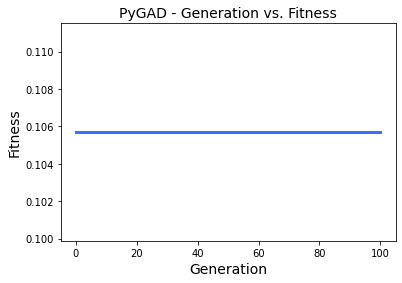

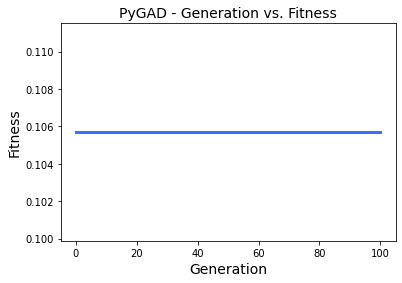

In [56]:
ga_instance.plot_fitness()